In [1]:
# Importing neccesary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# loading data of CSV format
data = pd.read_csv("Apple_Store_Reviews.csv")

#previewing Data
data

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Headspace,30,2023-11-15,3,"Good, but the premium content is expensive.",65,iPhone SE,6.284.11,US,0.00,Health
996,997,Duolingo,19,2024-09-27,1,Disappointing. Hard to follow and buggy.,4,iPhone SE,6.293.8,Canada,7.25,Education
997,998,Duolingo,38,2023-06-07,5,Excellent for learning new skills!,85,iPhone 11,10.277.15,Mexico,13.33,Education
998,999,Instagram,52,2024-03-04,4,"Great app, but sometimes it lags.",55,iPhone 13,3.52.20,US,6.37,Social


In [2]:
data.describe()

,Review_ID,User_Age,Rating,Likes,Purchase_Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.211000,2.869000,44.776000,5.361120
std,288.819436,11.908917,1.467649,28.685444,5.755652
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,250.750000,30.000000,1.000000,17.000000,0.000000
50%,500.500000,39.000000,3.000000,42.500000,4.995000
75%,750.250000,49.000000,4.000000,71.000000,10.192500
max,1000.000000,60.000000,5.000000,100.000000,19.970000


Let's start anaylsing some Statistical aspects of this data

In [2]:
# Question-1     "Calculating Mean, Median and mode for the rating column"
mean = data["Rating"].mean()
median = data["Rating"].median()
mode = data["Rating"].mode()

#Printing mean, median and mode
print("Mean :" , mean)
print("Median :" , median)
print("Mode :" , mode)

Mean : 2.869
Median : 3.0
Mode : 0    1
Name: Rating, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

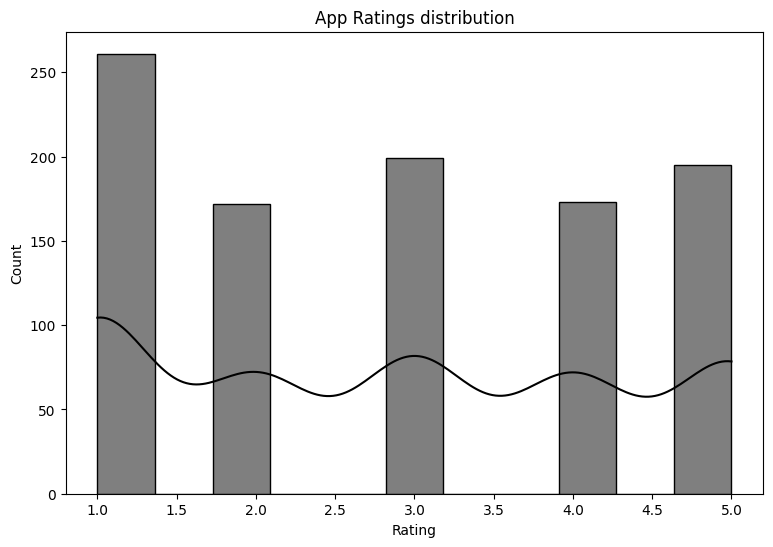

In [3]:
# Plotting the histogram for better understanding of which measure is best suited.

plt.figure(figsize = (9,6))
sns.histplot(data["Rating"], color = "black" , kde = True)
plt.title("App Ratings distribution")
plt.savefig("Rating analysis.jpg")
plt.show

In [4]:
#Question-2     "Finding the Range and Inter quartile range (IQR) for purchase amount"
Range = (data["Purchase_Amount"].max() - data["Purchase_Amount"].min()).round(2)
IQR = (data["Purchase_Amount"].quantile(0.75) - data["Purchase_Amount"].quantile(0.25)).round(2)

#printing the Range and IQR
print("Range of Purchase amount: ", Range)
print("IQR of Purchase amount: ", IQR)

Range of Purchase amount:  19.97
IQR of Purchase amount:  10.19


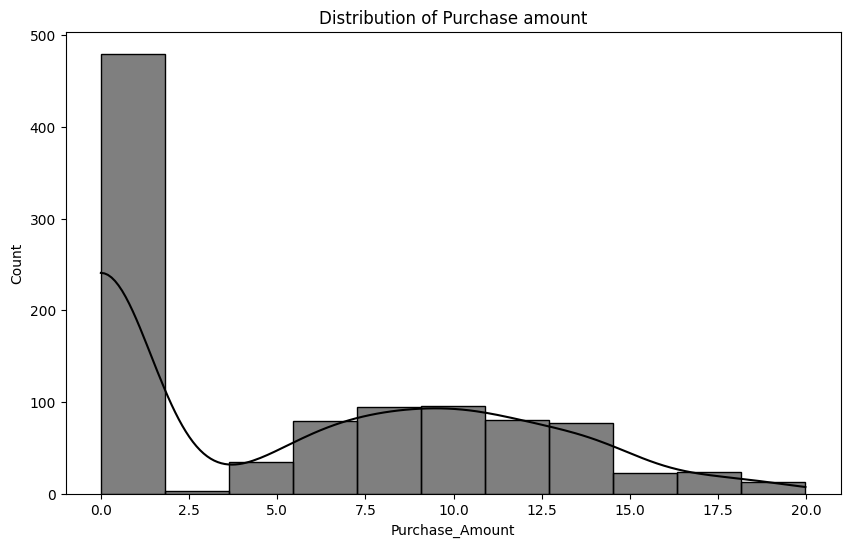

In [5]:
# Plotting the histogram for visual presentations
plt.figure(figsize=(10,6))
sns.histplot(data["Purchase_Amount"], color = "black" ,kde = True)
plt.savefig("Purchse amount range.jpg")
plt.title("Distribution of Purchase amount")
plt.show()

In [6]:
#Question-3    "Calculate the variance and standard deviation for the number of likes received on reviews"

Variance = data["Likes"].var().round(2)
STD = data["Likes"].std().round(2)

# Printing the Variance and standard deviation of Number of likes on reviews

print("Variance of number of likes recieved on reviews :", Variance)
print("Standard deviation of likes recieved in reviews :", STD)

Variance of number of likes recieved on reviews : 822.85
Standard deviation of likes recieved in reviews : 28.69


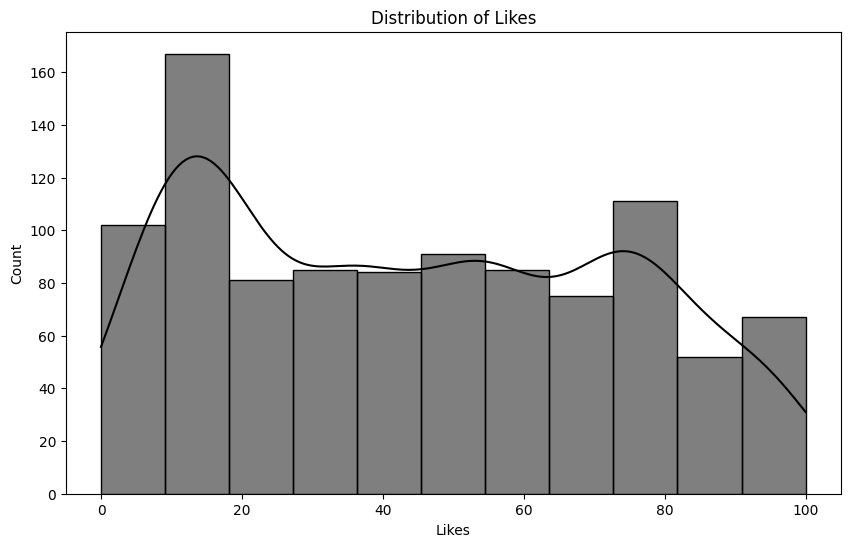

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data["Likes"], color = "black" ,kde = True)
plt.title("Distribution of Likes")
plt.savefig("likes received.jpg")
plt.show()

In [8]:
# Question-4    "Determine the correlation between the likes and the rating given"

Correlation = data["Likes"].corr(data["Rating"]).round(5)

print("Correaltion between Likes recieved and Rating given :", Correlation)

Correaltion between Likes recieved and Rating given : 0.84254


Text(0, 0.5, 'Rating Given')

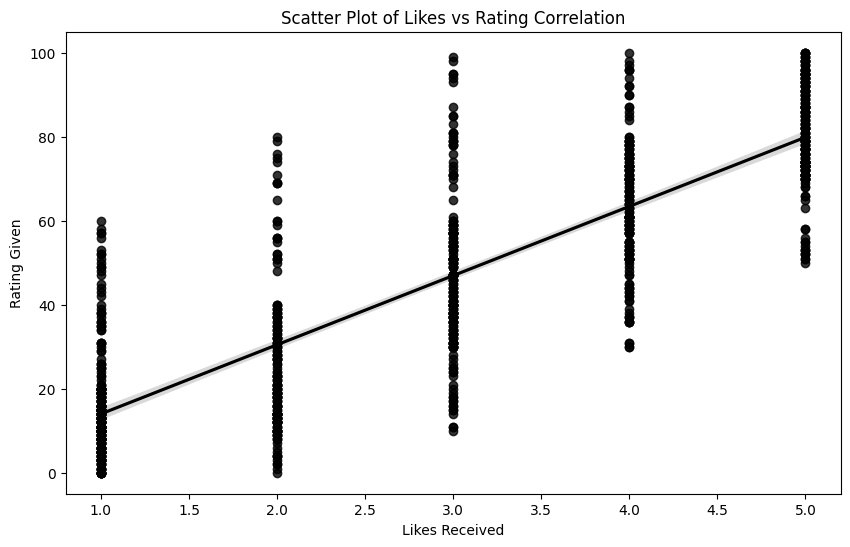

In [9]:
# Plot the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x="Rating", y="Likes", data=data, scatter_kws={"color": "black"}, line_kws={"color": "black"})

plt.title("Scatter Plot of Likes vs Rating Correlation")
plt.xlabel("Likes Received")
plt.ylabel("Rating Given")

<function matplotlib.pyplot.show(close=None, block=None)>

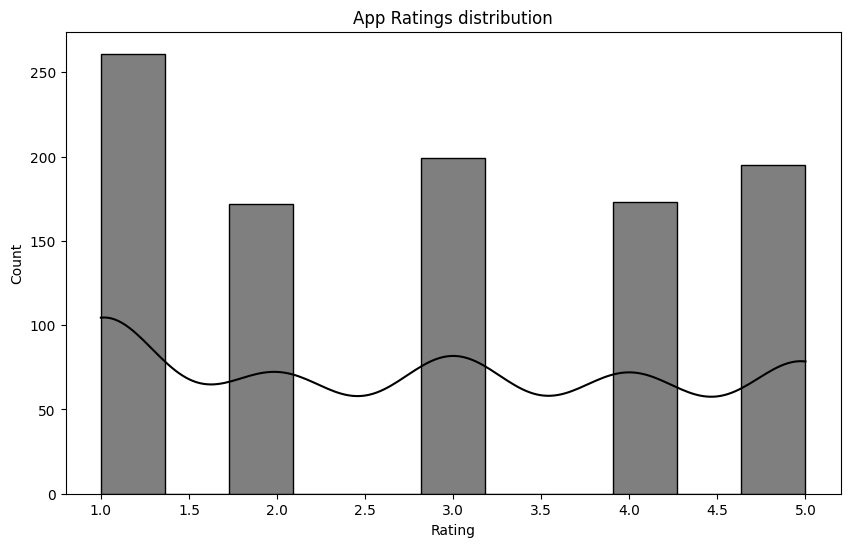

In [10]:
# Question-5 "Plot the distribution of the app ratings.
#     Is the distribution positively or negatively skewed?
#     What does this indicate about user satisfaction?

plt.figure(figsize = (10,6))
sns.histplot(data["Rating"], color = "black" ,kde = True)
plt.title("App Ratings distribution")
plt.show

In [11]:
# Question -6  "Perform a hypothesis test to determine if the average rating for 
#  Instagram is significantly higher than the average rating for WhatsApp.

instagram_ratings = data[data['App_Name'] == 'Instagram']['Rating']
whatsapp_ratings = data[data['App_Name'] == 'WhatsApp']['Rating']

In [12]:
t_stat, p_value = stats.ttest_ind(instagram_ratings, whatsapp_ratings, alternative='greater')
t_stat, p_value = t_stat.round(4), p_value.round(4)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Instagram's average rating is significantly higher than WhatsApp's.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the ratings.")

T-statistic: -0.7967
P-value: 0.7868
Fail to reject the null hypothesis: No significant difference between the ratings.


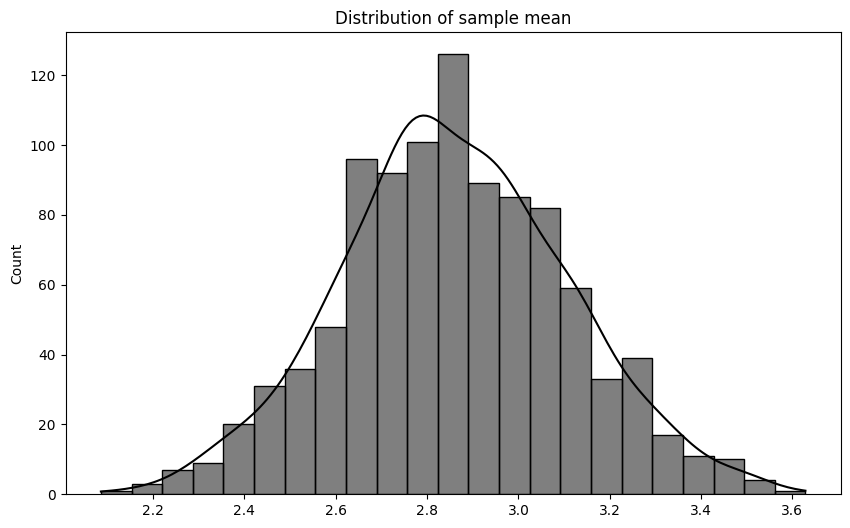

In [13]:
# Question-7  "Take random samples of ratings from the dataset and calculate their means."

Sample_mean = []
for i in range(1000):
    sample = np.random.choice(data["Rating"], size = 35)
    Sample_mean.append(np.mean(sample))

# plotting charting for better visualization
plt.figure(figsize = (10,6))
sns.histplot(Sample_mean, color = "black" ,kde = True)
plt.title("Distribution of sample mean")
plt.savefig("Sample mean distribution.jpg")
plt.show()   